# Modelo de Regresión Logística - Enfermedad Cardíaca

## Importaciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import joblib

## Carga del Dataset

In [2]:
df = pd.read_csv("heart_disease_cleaned.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Preprocesamiento del Dataset

In [3]:
# Eliminamos columnas innecesarias
df = df.drop('id', axis=1)

# Convertimos la variable objetivo en binaria
df['num'] = (df['num'] > 0).astype(int)

# Codificamos variables categóricas
df = pd.get_dummies(df, drop_first=True)

# Definimos X e y
X = df.drop('num', axis=1)
y = df['num']

## Entrenamiento del Modelo de Regresión Logística

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.2f}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Precisión del modelo: 0.83

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        86
           1       0.87      0.84      0.85       118

    accuracy                           0.83       204
   macro avg       0.83      0.83      0.83       204
weighted avg       0.83      0.83      0.83       204



c:\Users\IPF-2025\Desktop\Actividad Regresión Logística\env\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Visualización - Matriz de Confusión

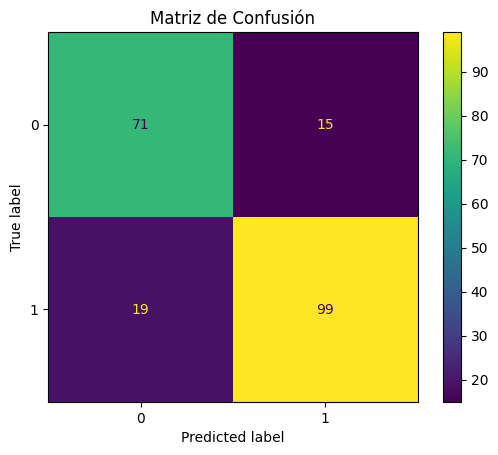

In [5]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Matriz de Confusión")
plt.show()

## Gráfico de Predicciones

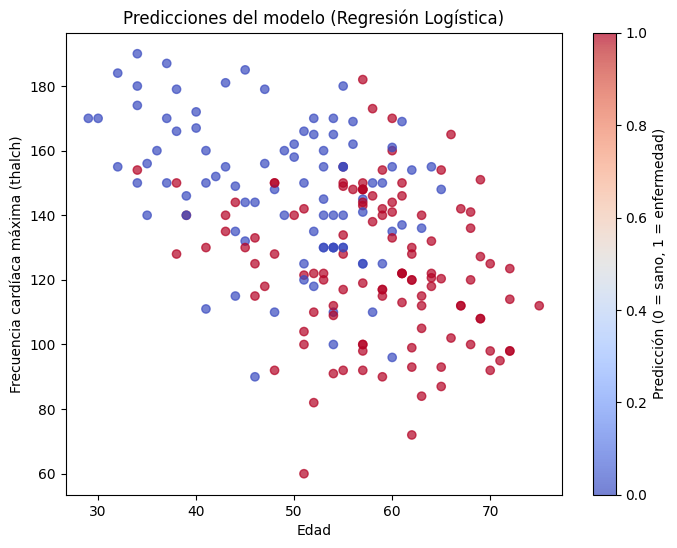

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X_test['age'], X_test['thalch'], c=y_pred, cmap='coolwarm', alpha=0.7)
plt.xlabel("Edad")
plt.ylabel("Frecuencia cardíaca máxima (thalch)")
plt.title("Predicciones del modelo (Regresión Logística)")
plt.colorbar(label="Predicción (0 = sano, 1 = enfermedad)")
plt.show()

## Guardado del Modelo

In [13]:
joblib.dump(model, "modelo_regresion_logistica.pkl")
joblib.dump(X.columns, "columnas_entrenamiento.pkl")

['columnas_entrenamiento.pkl']

## Cargar el modelo guardado

In [14]:

model = joblib.load("modelo_regresion_logistica.pkl")
columnas_entrenamiento = joblib.load("columnas_entrenamiento.pkl")

## Predicción con nuevos datos de un paciente

In [15]:
# Crear el nuevo paciente en formato diccionario
datos_paciente = {
    'age': 57, 'sex': 1, 'cp': 2, 'trestbps': 130, 'chol': 236,
    'fbs': 0, 'restecg': 0, 'thalach': 174, 'exang': 0,
    'oldpeak': 1.0, 'slope': 1, 'ca': 2, 'thal': 2
}
df_paciente = pd.DataFrame([datos_paciente])

# Aplicar get_dummies de la misma forma que antes
df_paciente_dummies = pd.get_dummies(df_paciente, drop_first=True)

# Asegurar que tenga las mismas columnas (rellenar con 0 las que falten)
df_paciente_dummies = df_paciente_dummies.reindex(columns=columnas_entrenamiento, fill_value=0)

# Hacer la predicción
prediccion = model.predict(df_paciente_dummies)
print("¿Tiene enfermedad cardíaca?:", "Sí" if prediccion[0] == 1 else "No")

¿Tiene enfermedad cardíaca?: Sí
